In [12]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())
  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  face_blendshapes_ranks = range(len(face_blendshapes_names))
  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")
  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

In [13]:
filename = "image2.jpg"

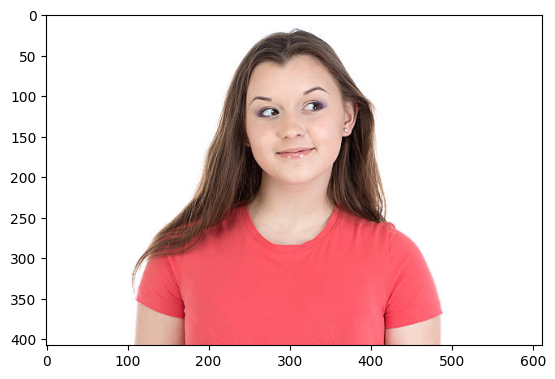

In [14]:
import cv2

img = cv2.imread(filename)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

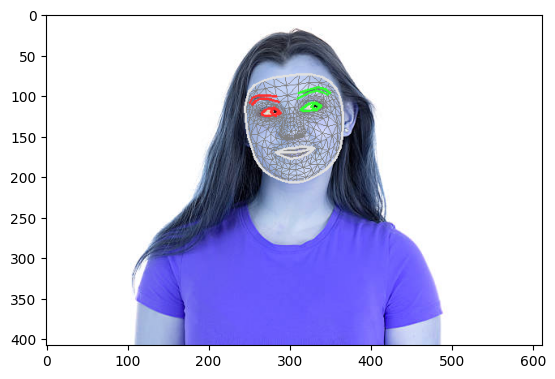

In [15]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

image = mp.Image.create_from_file(filename)
detection_result = detector.detect(image)
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))

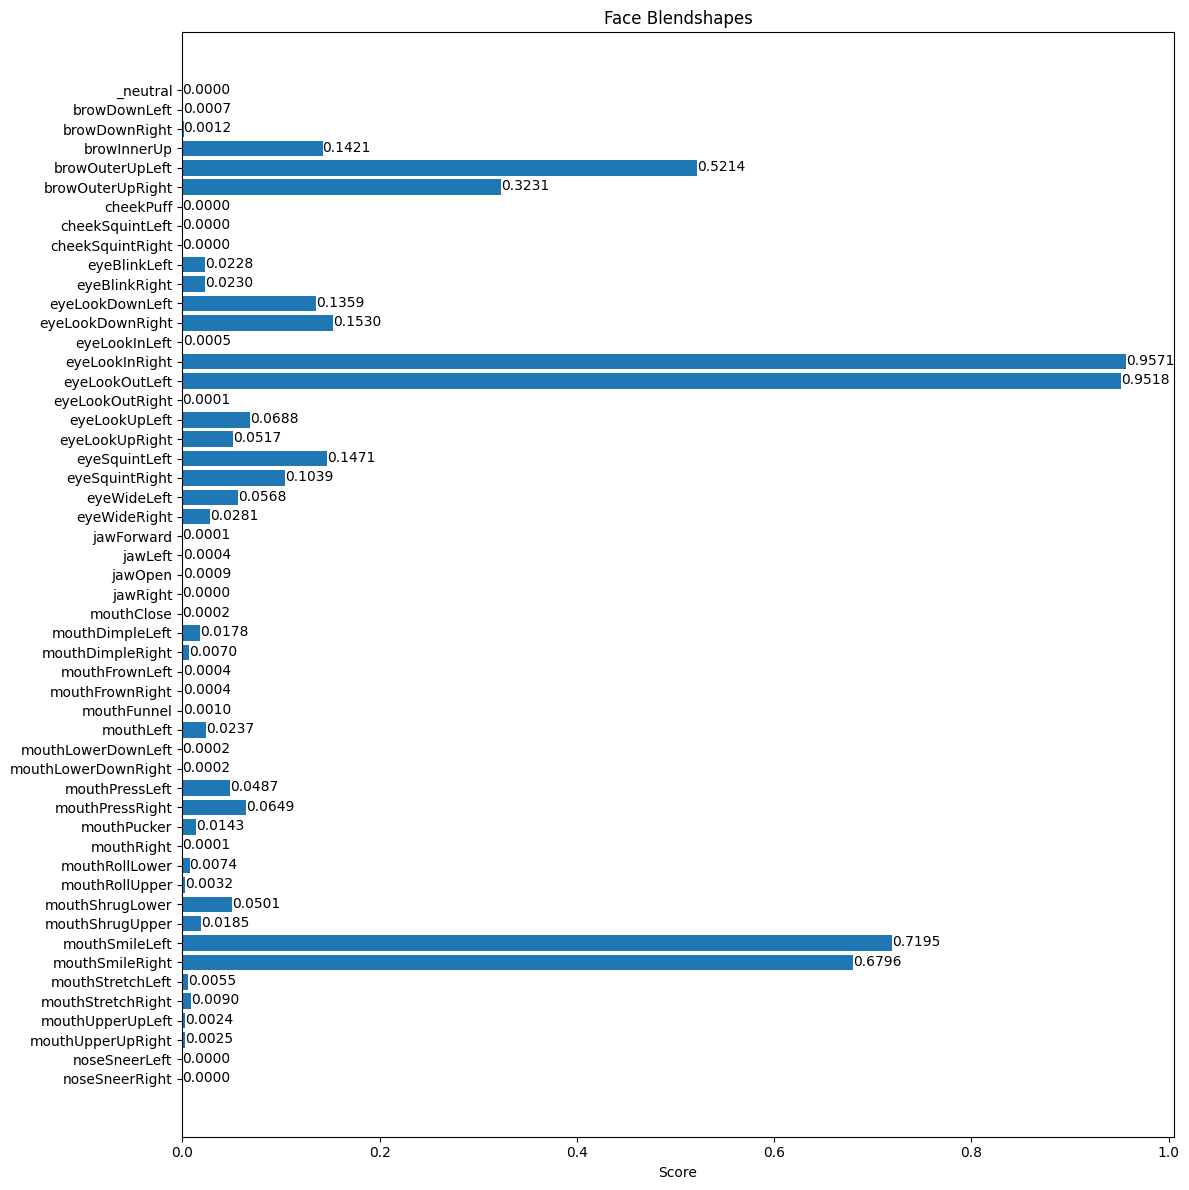

In [16]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

In [17]:
for blenshape_cat_id in range(len(detection_result.face_blendshapes[0])):
    print(blenshape_cat_id, detection_result.face_blendshapes[0][blenshape_cat_id].category_name, detection_result.face_blendshapes[0][blenshape_cat_id].score)

0 _neutral 1.6117224959089071e-06
1 browDownLeft 0.0006692714523524046
2 browDownRight 0.0011914456263184547
3 browInnerUp 0.14211444556713104
4 browOuterUpLeft 0.5214371681213379
5 browOuterUpRight 0.32311612367630005
6 cheekPuff 3.068697697017342e-05
7 cheekSquintLeft 3.1774206377122027e-07
8 cheekSquintRight 7.875481742303236e-07
9 eyeBlinkLeft 0.022806037217378616
10 eyeBlinkRight 0.02297145314514637
11 eyeLookDownLeft 0.13590934872627258
12 eyeLookDownRight 0.15304459631443024
13 eyeLookInLeft 0.000510134850628674
14 eyeLookInRight 0.9571298360824585
15 eyeLookOutLeft 0.9518054127693176
16 eyeLookOutRight 5.1087434258079156e-05
17 eyeLookUpLeft 0.0687820091843605
18 eyeLookUpRight 0.05168646201491356
19 eyeSquintLeft 0.14709806442260742
20 eyeSquintRight 0.10390932857990265
21 eyeWideLeft 0.05677272751927376
22 eyeWideRight 0.028086064383387566
23 jawForward 9.109085658565164e-05
24 jawLeft 0.00044205659651197493
25 jawOpen 0.0009341919212602079
26 jawRight 4.1864968807203695e-05


In [18]:
print(detection_result.facial_transformation_matrixes)

[array([[ 9.91666019e-01, -1.09216310e-01, -6.83365688e-02,
         1.47471400e-02],
       [ 1.01868704e-01,  9.89443183e-01, -1.03073120e-01,
         8.36068344e+00],
       [ 7.88724348e-02,  9.52526182e-02,  9.92323279e-01,
        -4.47332039e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])]
